In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🐼 Pandas Worksheet: Exploratory Analysis
---

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐Bonus: Try out to process the large dataset



In [103]:
import os

def read_csv(name, timestamp=False):
    
    data_path = './data/ml-latest-small/'
    
    df = pd.read_csv(os.path.join(data_path, name + '.csv'))
    if timestamp:
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
        del df['timestamp']
        
    return df


links = read_csv('links')
tags = read_csv('tags', timestamp=True)

---
## Ratings table

In [104]:
ratings = read_csv('ratings', timestamp=True)
ratings

,userId,movieId,rating,datetime
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


#### How many unique users and movies are in the dataset?

In [3]:
print('uniq userId: %d' % ratings['userId'].nunique())
print('uniq movieId: %d' % ratings['movieId'].nunique())

uniq userId: 610
uniq movieId: 9724


#### a) What is the average rating, b) which rating appears the most?

In [33]:
ratings['rating'].mean()

3.501556983616962

In [43]:
ratings[['rating']].value_counts().sort_values(ascending=False).reset_index().loc[0, 'rating']

4.0

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [10]:
ratings.tail()

,userId,movieId,rating,datetime
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12
100835,610,170875,3.0,2017-05-03 21:20:15


<AxesSubplot:ylabel='Frequency'>

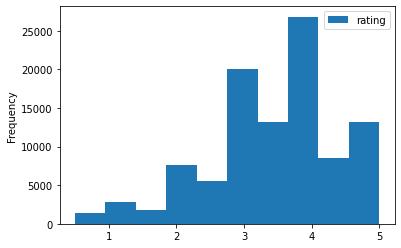

In [22]:
ratings[['rating']].plot.hist()

In [19]:
ratings.groupby("rating")[['userId']].count().rename(columns={'userId': 'relative frequency %'}) * 100 \
    / ratings['rating'].count()

,relative frequency %
rating,
0.5,1.358642
1.0,2.787695
1.5,1.776151
2.0,7.488397
2.5,5.503987
3.0,19.880797
3.5,13.027093
4.0,26.595660
4.5,8.480106


#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [30]:
# ratings[ratings['userId'] == 1]
ratings.groupby('userId')['rating'].count().sort_values(ascending=False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: rating, Length: 610, dtype: int64

#### How many users have rated more than 20 movies?

In [62]:
ratings_cnt_by_user = ratings.groupby('userId')['rating'].count().sort_values(ascending=False)
len(ratings_cnt_by_user[ratings_cnt_by_user > 20])

596

#### a) How many movies rated the user with the most/ least ratings? b) What is the *median* number of ratings?

- use your results from the previous question

In [88]:
# How many movies rated the user with the most ratings:
ratings_cnt_by_user.head(1).values[0]

2698

In [90]:
# How many movies rated the user with the least ratings:
ratings_cnt_by_user.tail(1).values[0]

20

In [97]:
# What is the median number of ratings:
ratings_cnt_by_user.median()

70.5

#### Draw a histogram or density plot of the distribution of the number of ratings per user! How would you characterize the distribution?

- use your results from the previous question
- Hint: `sns.histplot()`

#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

#### Which user gave the worst ratings on average, which user gave the best ratings?

- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

#### Plot the distribution of average ratings!

#### ⭐*Bonus*: Are users who have given more ratings also stricter?

- Derive the correlation between the average rating and the number of ratings per user!

--- 
## Movies table

In [99]:
movies = read_csv('movies')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [102]:
movies[movies['title'].duplicated(keep=False)]

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [149]:
rated_movies = ratings['movieId'].unique()
movies[~movies['movieId'].isin(rated_movies)]
movies['hasRating'] = movies['movieId'].isin(rated_movies)
movies.tail()

,movieId,title,genres,year,hasRating
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,True
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,True
9739,193585,Flint (2017),Drama,2017,True
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,True
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991,True


#### ⭐Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [141]:
movies['year'] = movies['title'].str.extract(r' \((\d+)\)')
movies.tail()

,movieId,title,genres,year
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991


#### ⭐Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [140]:
genres = movies['genres'].str.split('|').explode()
genres = pd.DataFrame(genres)
genres = genres.merge(movies['movieId'], left_index=True, right_index=True)
genres
# movies[movies['movieId'] == 193587]

,genres,movieId
0,Adventure,1
0,Animation,1
0,Children,1
0,Comedy,1
0,Fantasy,1
...,...,...
9738,Fantasy,193583
9739,Drama,193585
9740,Action,193587
9740,Animation,193587


---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

#### Count the number of ratings per movie title!

#### Use your previous results: What are the top 10 most rated movies in the dataset?

#### Calculate the average rating per movie title!

#### Make a visualization of the distribution of average ratings per movie

#### Which movie was rated the best? Which movie was rated the worst?

- ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? 

#### ⭐*Bonus*: Did the average rating of movies improve over time? 

- Use your results from the previous ⭐bonus exercises
- Visualize your findings in a nice plot

---
## Recommender function steps


##### 1. _candidate generation_: create a subset of potential items

Example: 

- items the user hasn't already interacted with
- items watched more than 100 times
- items with an average rating above 4


##### 2. _scoring_: given the query input, predict a score for each candidate item

Example: 

- the average rating of the top 10 most similar users

##### 3. _ranking_: recommend the top 10 (5, 3, ..., k) items with the highest score



In [8]:
def recommend(query, ratings, k=10):
    """
    Filters and recommends the top k movies for any given input query. 
    Returns a list of k movie ids.
    """
    # 1. candidate generation
    
    # 2. scoring
    
    # 3. ranking
    
    return []

---
## Task: Your first recommender

Implement a recommender function that recommends the most popular movies to a user.

In [9]:
def recommend_popular(query, ratings, k=10):
    """
    Filters and recommends the top k movies for any given input query. 
    Returns a list of k movie ids.
    """
    # 1. candidate generation
    
    ## filter out movies that the user has already seen
    ## filter out movies that have been watched by fewer than 20/50/100... users
    
   
    # 2. scoring
    
    ## calculate the average rating for each movie
    
    
    # 3. ranking
    
    ## return the top-k highest rated movie ids or titles
    
    return [176, 23, 908, 4, 87]